In [1]:
import matplotlib.pyplot as plt
import numpy as np

import math
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
def compute_std(iterations_skip, k_effective):
    
    sample_std = []
    for i in range(iterations_skip, len(k_effective)):
        sample_std.append(np.std(k_effective[:i])/ np.sqrt(i - 1))
        
    return sample_std

In [3]:
def make_standart_fx(k_0, x_0, number_iterations):
    
    standart_fx = []
    for i in range(x_0, number_iterations):
        standart_fx.append(k_0 / math.sqrt(i))
    return standart_fx
        
    

In [4]:
def get_k_effective_from_file(file_name):
    count = 0
    lines = []
    with open(file_name) as fp:
        for line in fp:
            count += 1
            lines.append(line)

    line_array = []
    for line in lines:
        line_array.append(line.split())
        
    k_effective_sample  = []

    for line in line_array:
        k_effective_sample.append(float(line[7]))
    
    return k_effective_sample

In [41]:
file_1000 = "/home/xeinia/Desktop/beachmarks_inf/results/measurings_reac/1000/simulation_output.txt"
file_2000 = "/home/xeinia/Desktop/beachmarks_inf/results/measurings_reac/2000/simulation_output.txt"
file_4000 = "/home/xeinia/Desktop/beachmarks_inf/results/measurings_reac/4000/simulation_output.txt"
file_6000 = "/home/xeinia/Desktop/beachmarks_inf/results/measurings_reac/6000/simulation_output.txt"
file_8000 = "/home/xeinia/Desktop/beachmarks_inf/results/measurings_reac/8000/simulation_output.txt"

In [42]:
names_measurings = [file_1000, file_2000, file_4000, file_6000, file_8000]

In [43]:
(2.612776752189073 - 2.612903) * 100000

-12.624781092718251

In [8]:
def print_graph_2(names_measurings, k_effective):
    
    for name in names_measurings:
        
        k_effective_sample = get_k_effective_from_file(name)
        k_effective_sample = np.absolute(np.array(k_effective_sample) - k_effective) 
        iterations = range(1, len(k_effective_sample) + 1)
        standart_fx = make_standart_fx(k_effective_sample[0], 1, len(iterations) + 1)
        
        standart_fx = np.array(standart_fx) * 100000
    
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
        
        std_, start_idx = compute_std(k_effective_sample) 

        std_ = np.array(std_) * 100000
      
        
        k_effective_sample = k_effective_sample * 100000
        ax1.plot(iterations, k_effective_sample,  label='actual')
        ax1.plot(iterations, standart_fx,  label='expected')
        
        ax1.set_xlabel('cycles', fontsize = 15)
        ax1.set_ylabel('error in  k effective [pcm]', fontsize = 15)
        ax1.tick_params(axis='x', labelsize=15)
        ax1.tick_params(axis='y', labelsize=15)
    
        ax1.legend()
        
        standart_std = make_standart_fx(std_[0] * math.sqrt(start_idx), start_idx, len(std_) + start_idx)
        iterations_secound = range(start_idx, len(std_) + start_idx)
        print( std_[-1])
        ax2.plot(iterations_secound, standart_std, label='actual')
        ax2.plot(iterations_secound, std_, label='expected')
        ax2.set_xlabel('cycles', fontsize = 15)
        ax2.set_ylabel('std [pcm]', fontsize = 15)
        ax2.tick_params(axis='x', labelsize=15)
        ax2.tick_params(axis='y', labelsize=15)
        


        ax2.legend()

In [30]:
cylinder_1000 = "/home/xeinia/Documents/measurings_simple_geometry/cylinder.txt"
cyliner_measurings = [cylinder_1000]

In [336]:
def func_1(x, a):

    return a/np.sqrt(x)

popt, pcov = curve_fit(func_1, iterations_secound, std_)



In [42]:
def func_1(x, a):

    return a/np.sqrt(x)


def print_fitting_graphs(input_k_effective, input_std_k_effective):

    start_idx = 200
    std_ = np.array(input_std_k_effective) * 100000
    iterations_secound = range(start_idx, len(input_std_k_effective) + start_idx)

    popt, pcov = curve_fit(func_1, iterations_secound, std_)

    print(std_[0:10])
    plt.figure(figsize=(10, 10), dpi=80)
    plt.plot(iterations_secound, std_, label='actual')
    plt.plot(iterations_secound, func_1(iterations_secound, popt[0]), 'r-', label='fitting by curve a/sqrt(x)')

    plt.title("dependance std on cycle", fontsize = 15)
    plt.xlabel('cycles', fontsize = 15)
    plt.ylabel('standart deviation [pcm]', fontsize = 15)
    plt.legend(fontsize = 15)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)


    iterations = range(1, len(input_k_effective) + 1)
    k_effective = np.abs((1.6 - np.array(input_k_effective)) *100000)
    popt, pcov = curve_fit(func_1, iterations, k_effective)

    plt.figure(figsize=(10, 10), dpi=80)
    plt.plot(iterations, k_effective, label='actual')
    plt.plot(iterations, func_1(iterations, popt[0]), 'r-', label='fitting by curve a/sqrt(x)')

    plt.title("dependance k effective error on cycle", fontsize = 15)
    plt.xlabel('cycles', fontsize = 15)
    plt.ylabel('k effective error [pcm]', fontsize = 15)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    plt.legend(fontsize = 15)

In [43]:
def get_k_effective_from_file(file_name):
    count = 0
    lines = []
    with open(file_name) as fp:
        for line in fp:
            count += 1
            lines.append(line)

    line_array = []
    for line in lines:
        line_array.append(line.split())
        
    k_effective_sample  = []

    for line in line_array:
        k_effective_sample.append(float(line[3]))
    
    return k_effective_sample

def merge_k_effective_files(files):
    
    merged_k_effective = []
    for file in files:
        k_effective_values = get_k_effective_from_file(file)
        merged_k_effective.extend(k_effective_values)
        
    return merged_k_effective

def compute_k_effective_mean(k_effective):
    
    mean_k_effective = []
    for i in range(1, len(k_effective)):
        mean_k_effective.append(sum(k_effective[:i]) / i)
    return mean_k_effective

In [44]:
def get_mean_std_by_sample(files):
    
    iterations_skip = 200
    k_effective = merge_k_effective_files(names_measurings)
    
    k_effective_mean = compute_k_effective_mean(k_effective)
    sample_std = compute_std(iterations_skip, k_effective)
    
    print("number iterations "+ str(len(k_effective)))
    print("k effective  " + str(k_effective_mean[-1]))
    print(" std [pcm]  "+ str(sample_std[-1] * 100000))
    
    return k_effective_mean, sample_std

In [45]:
file_1 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/6_groups_gpu/1/output.txt"
file_2 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/6_groups_gpu/2/output.txt"
file_3 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/6_groups_gpu/3/output.txt"
file_4 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/6_groups_gpu/4/output.txt"
file_5 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/6_groups_gpu/5/output.txt"
file_6 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/6_groups_gpu/6/output.txt"
file_7 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/6_groups_gpu/7/output.txt"
file_8 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/6_groups_gpu/8/output.txt"
file_9 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/6_groups_gpu/9/output.txt"
file_10 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/6_groups_gpu/10/output.txt"



names_measurings = [file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_9,
                   file_10 ]

In [46]:
final_k_effective, final_std = get_mean_std_by_sample(names_measurings)

number iterations 7191
k effective  1.6000414973114028
 std [pcm]  3.5289653632989695


In [40]:
print(min(final_k_effective))

-391.6094127150771


[21.18121665 21.13328143 21.06267441 21.08161261 21.04856572 21.06324532
 20.96310842 20.93509376 20.85738551 20.75963628]


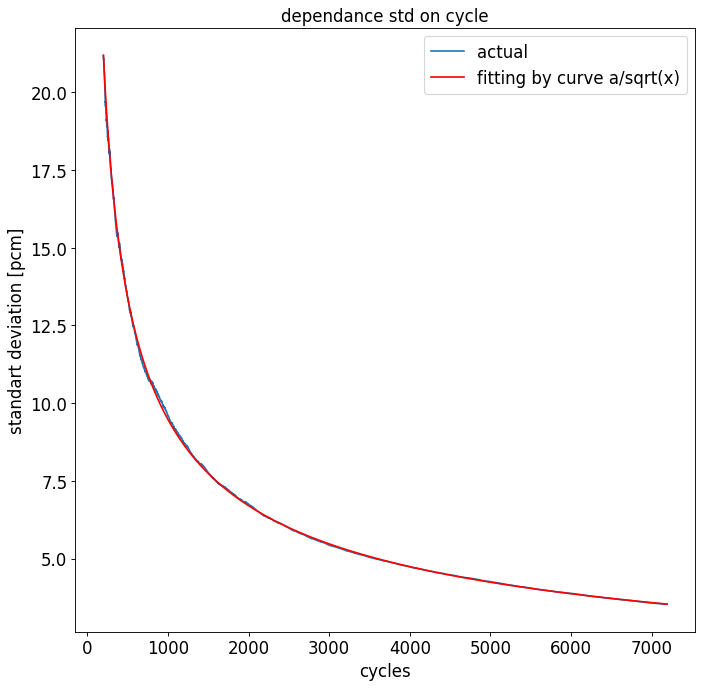

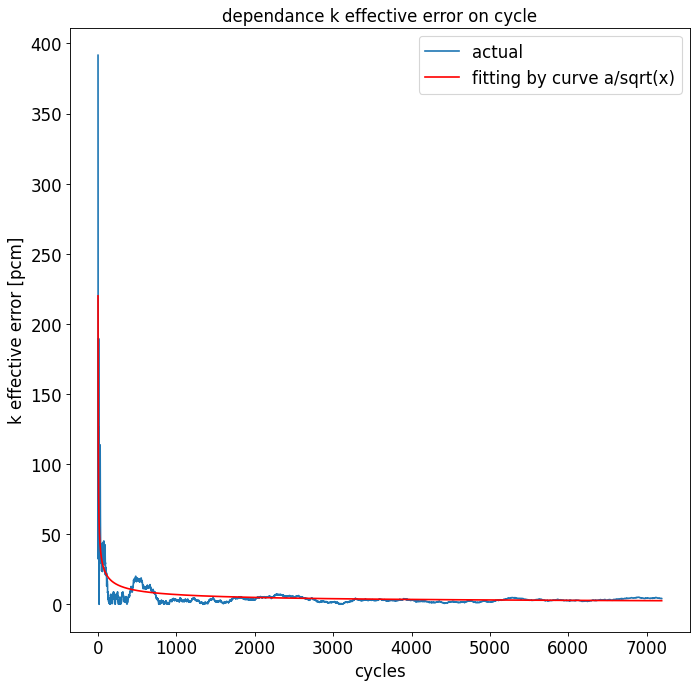

In [47]:
print_fitting_graphs(final_k_effective, final_std)

In [195]:
file_1 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/U235_reactor/1/output.txt"
file_2 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/U235_reactor/2/output.txt"
file_3 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/U235_reactor/3/output.txt"
file_4 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/U235_reactor/4/output.txt"
file_5 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/U235_reactor/5/output.txt"
file_6 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/U235_reactor/6/output.txt"
file_7 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/U235_reactor/7/output.txt"
file_8 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/U235_reactor/8/output.txt"
file_9 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/U235_reactor/9/output.txt"
file_10 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/U235_reactor/10/output.txt"



names_measurings = [file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9,
                   file_10 ]

In [196]:
final_k_effective, final_std = get_mean_std_by_sample(names_measurings)

number iterations 8990
k effective  0.9999640072935156
 std [pcm]  5.150021051104412


[33.41292995 33.47585499 33.52428095 33.67540989 33.6054893  33.48169697
 33.60161905 33.5762509  33.43328961 33.31061618]


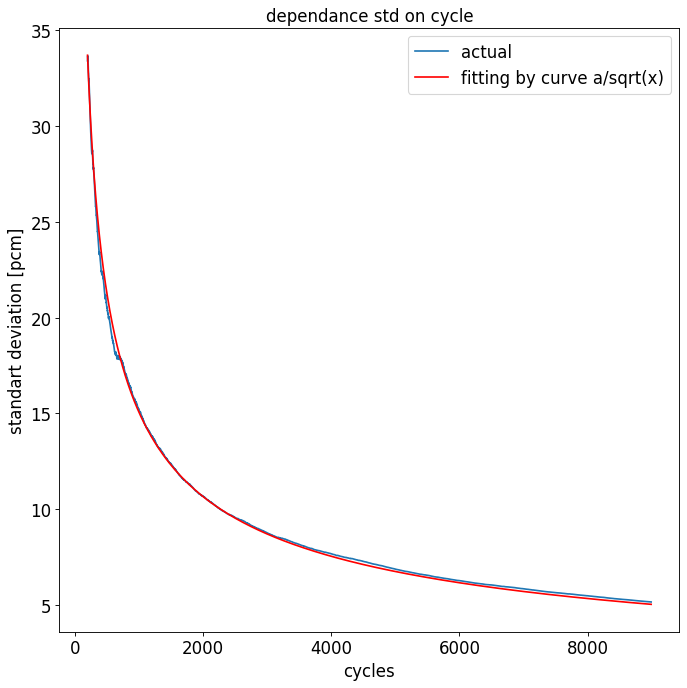

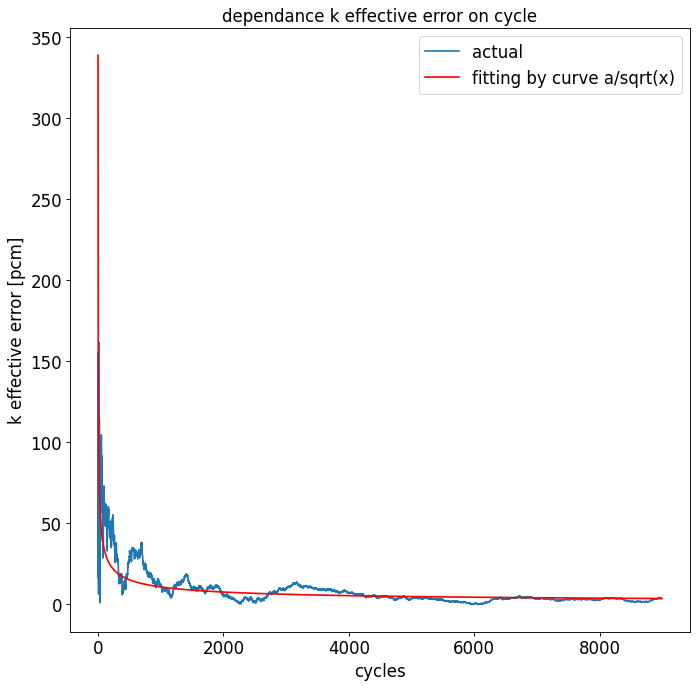

In [197]:
print_fitting_graphs(final_k_effective, final_std)

In [198]:
file_1 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_geometry_slub/1/output.txt"
file_2 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_geometry_slub/2/output.txt"
file_3 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_geometry_slub/3/output.txt"
file_4 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_geometry_slub/4/output.txt"
file_5 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_geometry_slub/5/output.txt"
file_6 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_geometry_slub/6/output.txt"
file_7 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_geometry_slub/7/output.txt"
file_8 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_geometry_slub/8/output.txt"
file_9 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_geometry_slub/9/output.txt"
file_10 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_geometry_slub/10/output.txt"

names_measurings = [file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9,
                   file_10]

In [199]:
final_k_effective, final_std = get_mean_std_by_sample(names_measurings)

number iterations 7990
k effective  1.000095556770007
 std [pcm]  6.651253486949786


[44.28528258 44.32135111 44.5057365  44.39558696 44.18607406 44.21265
 44.08356507 44.10165087 43.95786194 43.75124263]


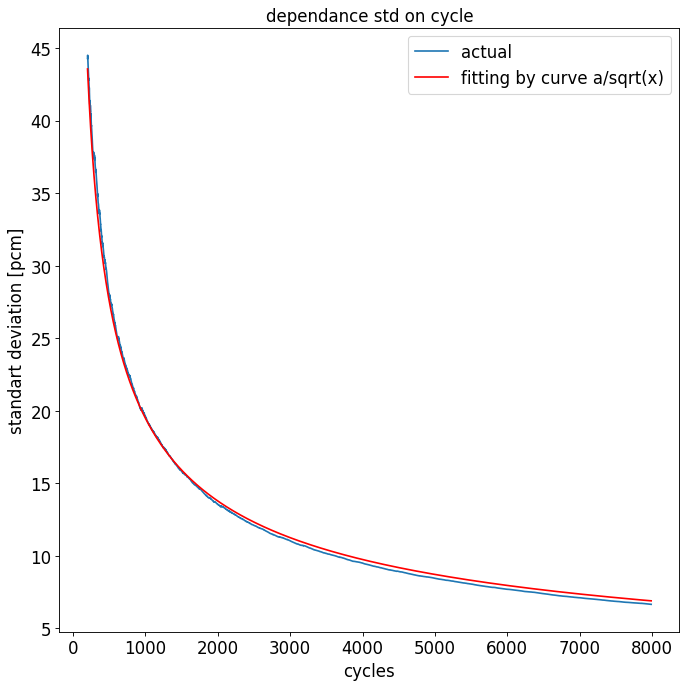

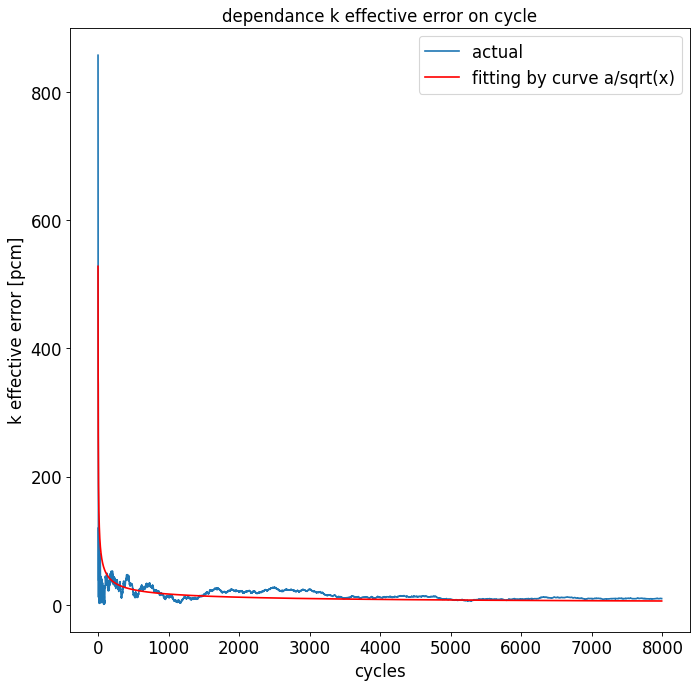

In [200]:
print_fitting_graphs(final_k_effective, final_std)

In [201]:
file_1 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_s/1/output.txt"
file_2 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_s/2/output.txt"
file_3 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_s/3/output.txt"
file_4 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_s/4/output.txt"
file_5 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_s/5/output.txt"
file_6 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_s/6/output.txt"
file_7 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_s/7/output.txt"
file_8 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_s/8/output.txt"
file_9 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_s/9/output.txt"
file_10 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/cylinder_s/10/output.txt"



names_measurings = [file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9,
                   file_10 ]

In [202]:
final_k_effective, final_std = get_mean_std_by_sample(names_measurings)

number iterations 7990
k effective  0.9999463801358993
 std [pcm]  6.141508787683825


[38.85402779 38.72970104 38.5876916  38.42920626 38.25322804 38.08610971
 37.90220511 38.14284521 37.97726545 37.79622145]


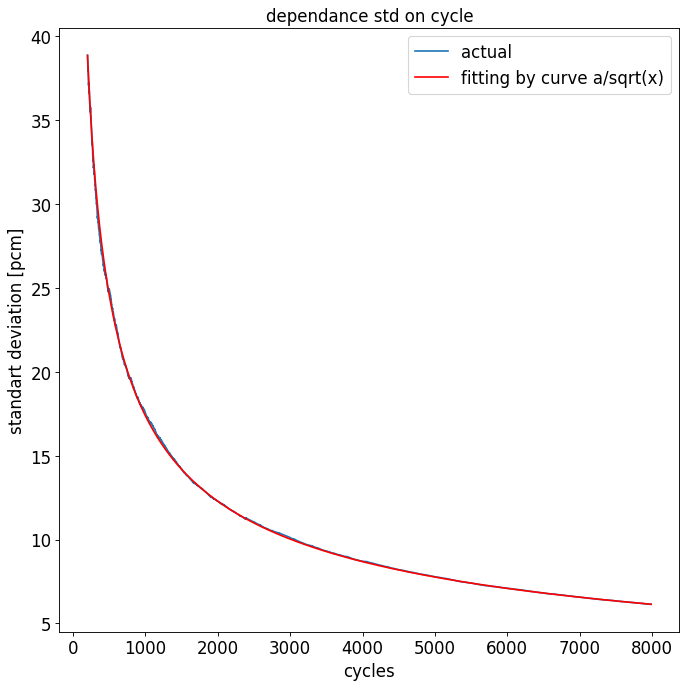

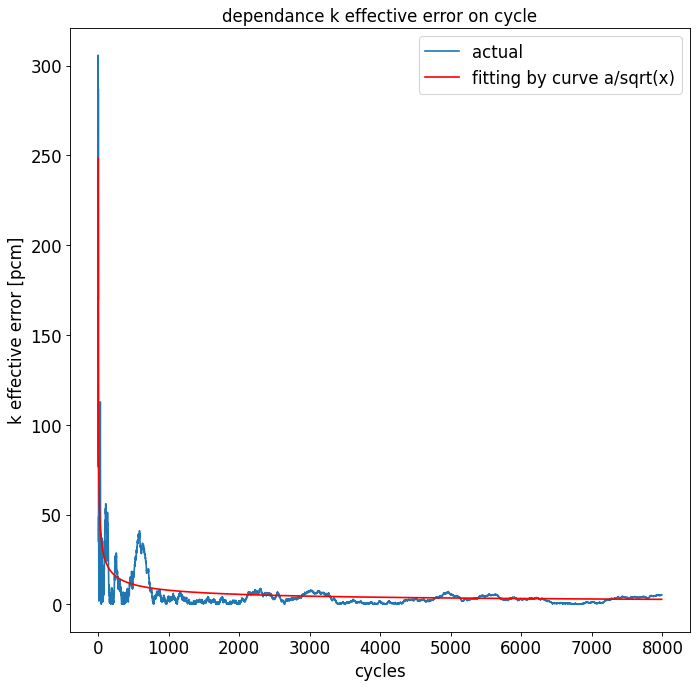

In [203]:
print_fitting_graphs(final_k_effective, final_std)

In [204]:
file_1 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_measurings_sphere/1/output.txt"
file_2 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_measurings_sphere/2/output.txt"
file_3 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_measurings_sphere/3/output.txt"
file_4 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_measurings_sphere/4/output.txt"
file_5 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_measurings_sphere/5/output.txt"
file_6 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_measurings_sphere/6/output.txt"
file_7 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_measurings_sphere/7/output.txt"
file_8 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_measurings_sphere/8/output.txt"
file_9 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_measurings_sphere/9/output.txt"
file_10 = "/home/xeinia/Documents/measurings_simple_geometry/MG_measurings_b1/multiple_measurings_sphere/10/output.txt"



names_measurings = [file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9,
                   file_10 ]

In [205]:
final_k_effective, final_std = get_mean_std_by_sample(names_measurings)

number iterations 7990
k effective  0.9999950275673295
 std [pcm]  6.113252563405102


[37.30687079 37.12506242 37.08610503 36.91348267 36.76130354 36.74379631
 36.72607329 36.64286909 36.46782335 36.30238447]


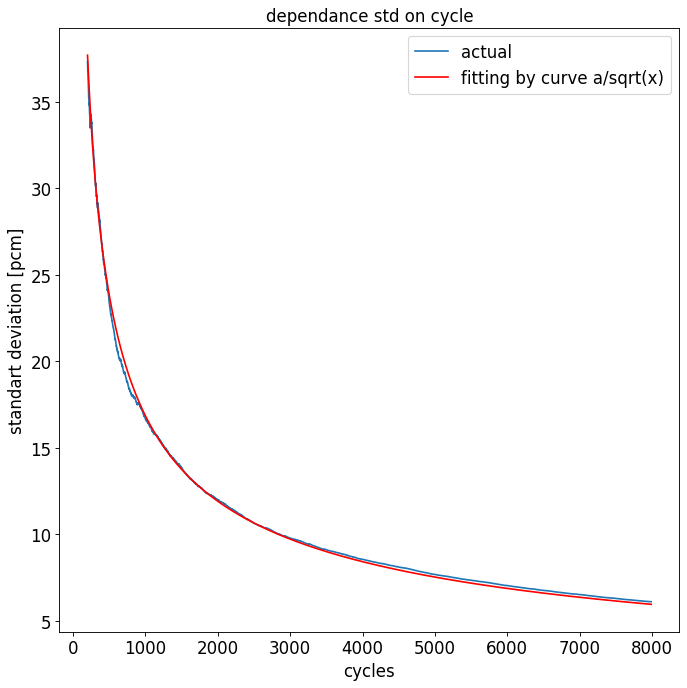

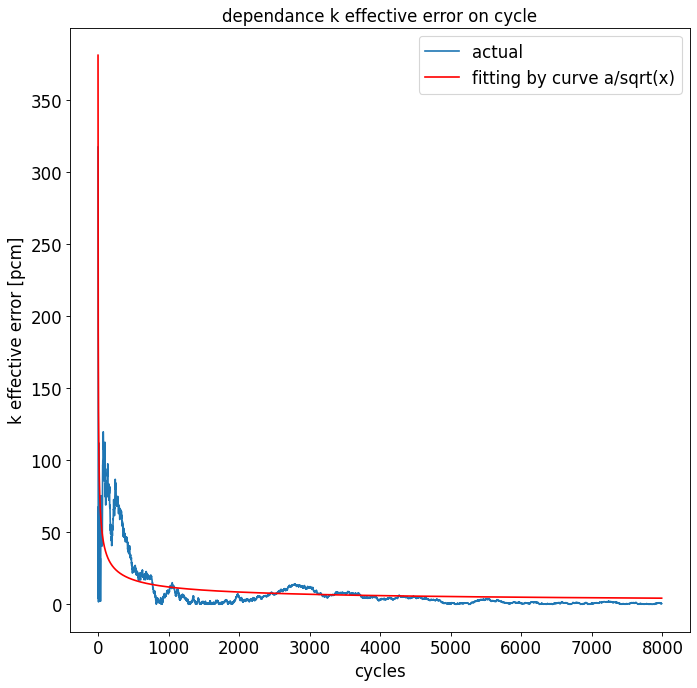

In [206]:
print_fitting_graphs(final_k_effective, final_std)

In [316]:
k_effective_sample = get_k_effective_from_file(file_1000)
k_effective_sample = np.absolute(np.array(k_effective_sample) -2.612903) * 100000

In [317]:
iterations = range(1, len(k_effective_sample) + 1)

popt, pcov = curve_fit(func_1, iterations, k_effective_sample)

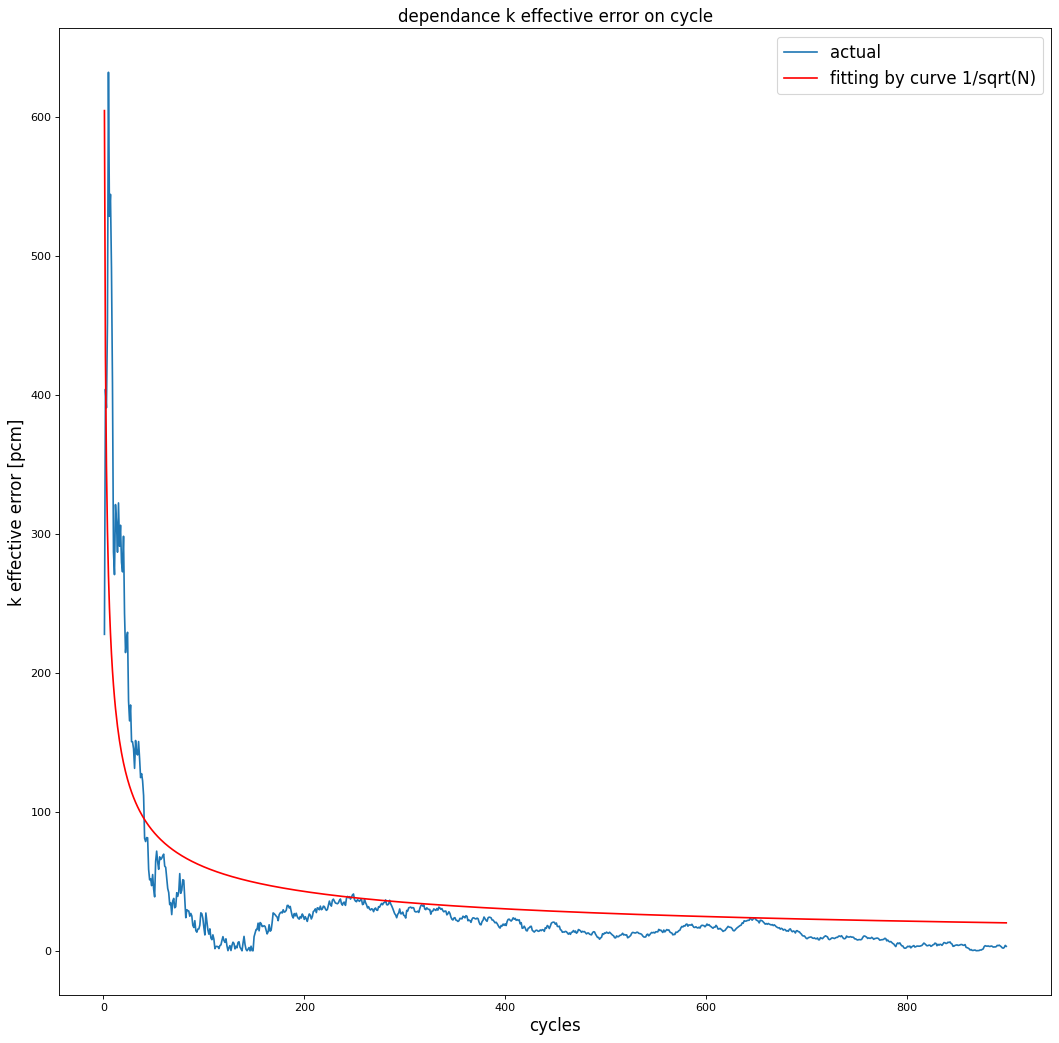

In [318]:
plt.figure(figsize=(16, 16), dpi=80)
plt.plot(iterations, k_effective_sample, label='actual')
plt.plot(iterations, func_1(iterations, popt[0]), 'r-', label='fitting by curve 1/sqrt(N)')

plt.title("dependance k effective error on cycle", fontsize = 15)
plt.xlabel('cycles', fontsize = 15)
plt.ylabel('k effective error [pcm]', fontsize = 15)
plt.legend(fontsize = 15)

In [13]:
k_effective_sample = np.absolute(np.array(k_effective_sample) -2.612903)

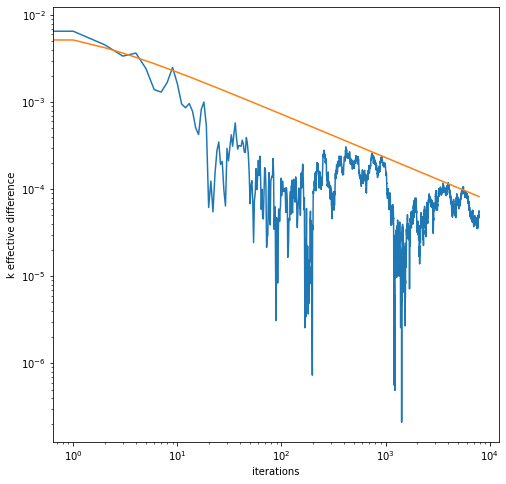

In [364]:
iterations = range(0, len(k_effective_sample ))
plt.figure(figsize=(8, 8))
plt.xlabel("iterations")
plt.ylabel("k effective difference")
standart_fx = make_standart_fx(k_effective_sample[0], 1, len(iterations) + 1)
plt.loglog(iterations, k_effective_sample)
plt.loglog(iterations, standart_fx)

In [128]:
print(std_1000[0])

0.0014112858006518978


In [129]:
print(std_1000[-1])

0.0006576040078875225


In [132]:
1/0.0006

1.6666666666666667

In [110]:
loglog
plt.loglog(standart_iterations, standart_fx)

1897


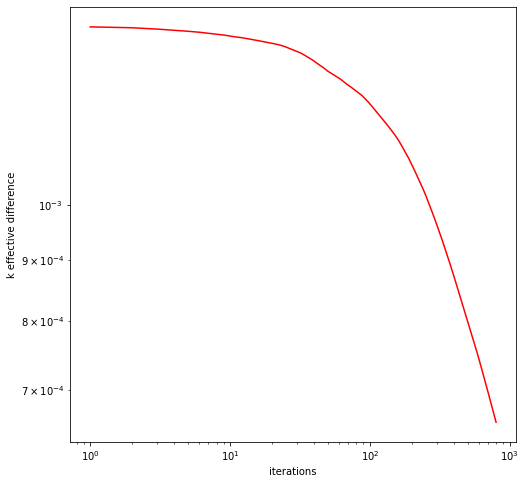

In [145]:
iterations = range(1, len(std_1000) + 1)

standart_fx = make_standart_fx(std_1000[0], 1, len(iterations))
standart_iterations = range(1, len(standart_fx) + 1)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.xlabel("iterations")
plt.ylabel("k effective difference")

plt.loglog(iterations, std_1000, color = "red")


In [106]:
k_effective_sample = get_k_effective_from_file(file_2000)
std_2000 = compute_std(k_effective_sample) 
print("std difference "+ str(std_2000[-1] * 100000))

std difference 44.18870408798252


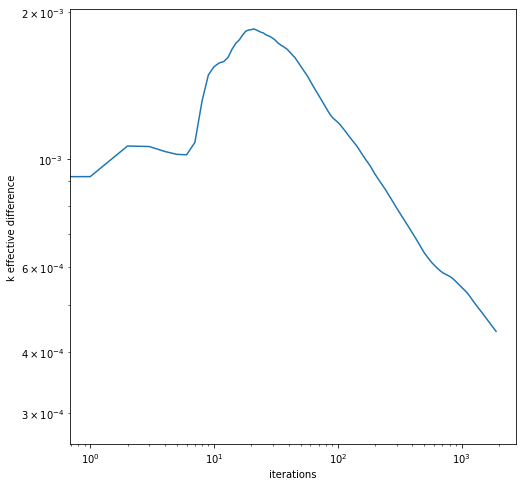

In [146]:
iterations = range(0, len(std_2000))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.xlabel("iterations")
plt.ylabel("k effective difference")
standart_fx = make_standart_fx(std_2000[0], 1, len(iterations) + 1)
plt.loglog(iterations, std_2000)


In [81]:
k_effective_sample = get_k_effective_from_file(file_4000)
std_4000 = compute_std(k_effective_sample) 
print("std difference "+ str(std_4000[-1] * 100000))

std difference 18.339840256422885


In [83]:
k_effective_sample = get_k_effective_from_file(file_6000)
std_6000 = compute_std(k_effective_sample) 
print("std difference "+ str(std_6000[-1] * 100000))

std difference 17.372059975335684


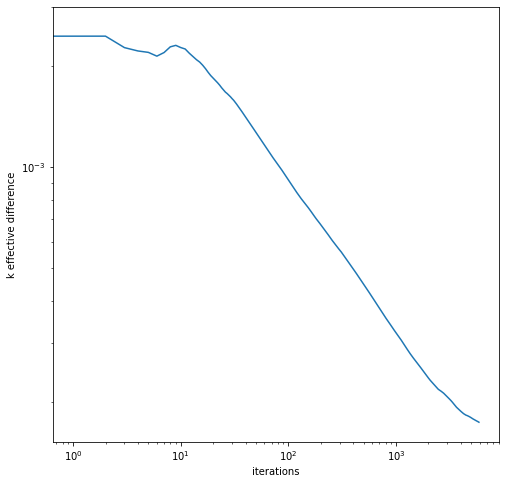

In [148]:
iterations = range(0, len(std_6000))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.xlabel("iterations")
plt.ylabel("k effective difference")
standart_fx = make_standart_fx(std_6000[0], 1, len(iterations) + 1)
plt.loglog(iterations, std_6000)


In [20]:
k_effective_sample = get_k_effective_from_file(file_8000)
std_8000 = compute_std(k_effective_sample) 
print("std difference "+ str(std_8000[-1] * 100000))

std difference 16.985780534635545


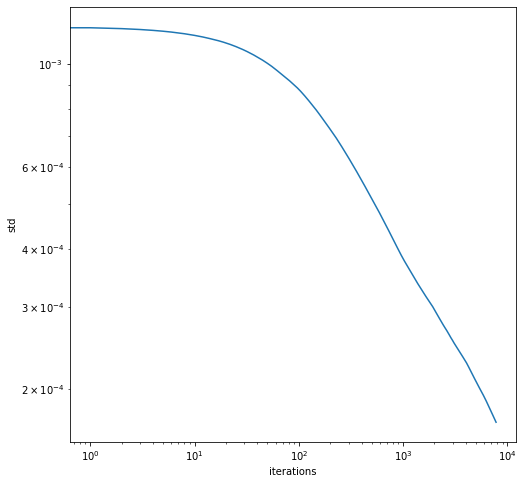

In [22]:
iterations = range(0, len(std_8000))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.xlabel("iterations")
plt.ylabel("std")
standart_fx = make_standart_fx(std_8000[0], 1, len(iterations) + 1)
plt.loglog(iterations, std_8000)


In [23]:
k_effective_sample = get_k_effective_from_file(file_8000)
k_effective_sample = np.absolute(np.array(k_effective_sample) -2.612903)

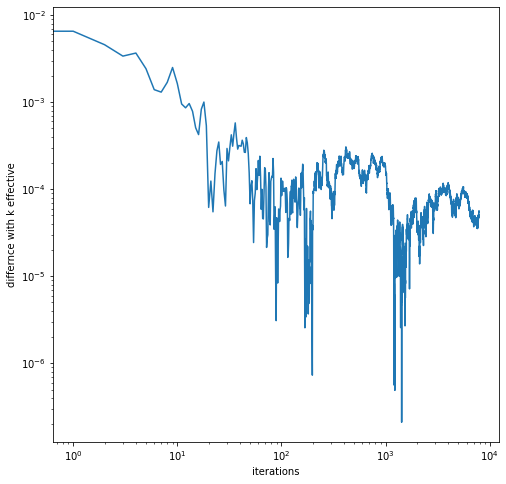

In [26]:
iterations = range(0, len(k_effective_sample))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.xlabel("iterations")
plt.ylabel("differnce with k effective")
standart_fx = make_standart_fx(std_8000[0], 1, len(iterations) + 1)
plt.loglog(iterations, k_effective_sample)


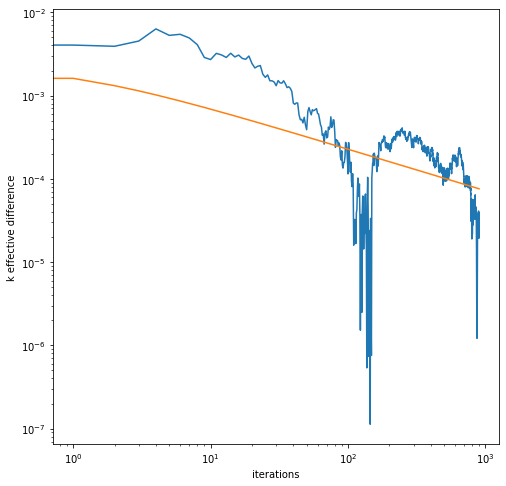

In [342]:
def print_graph_2(names_measurings):
    
    for name in names_measurings:
        
        k_effective_sample = get_k_effective_from_file(name)
        k_effective_sample = np.absolute(np.array(k_effective_sample) - 2.290323) 
        iterations = range(0, len(k_effective_sample))
        standart_fx = make_standart_fx(k_effective_sample[0], 1, len(iterations) + 1)
    
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
        
        std_ = compute_std(k_effective_sample) 
        std_ = np.array(std_) * 100000
        
        standart_fx = np.array(standart_fx) * 100000
      
        
        k_effective_sample = k_effective_sample * 100000
        ax1.loglog(iterations, k_effective_sample)
        ax1.set(xlabel='iterations', ylabel='difference k effective [pcm]')
        ax1.loglog(iterations, standart_fx)
        
        iterations_secound = range(2, len(std_) + 1)
        ax2.loglog(iterations_secound, std_)
        ax2.set(xlabel='iterations', ylabel='std [pcm]')
        standart_std = make_standart_fx(std_[1], 1, len(iterations_secound) + 1)

        ax2.loglog(iterations_secound, standart_std)
        
        

In [38]:
def print_graph_2(names_measurings):
    
    for name in names_measurings:
        
        k_effective_sample = get_k_effective_from_file(name)
        k_effective_sample = np.absolute(np.array(k_effective_sample) - 2.290323) 
        iterations = range(0, len(k_effective_sample))
        standart_fx = make_standart_fx(k_effective_sample[0], 1, len(iterations) + 1)
        
        standart_fx = np.array(standart_fx) * 100000
    
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
        
        std_, start_idx = compute_std(k_effective_sample) 

        std_ = np.array(std_) * 100000
      
        
        k_effective_sample = k_effective_sample * 100000
        ax1.loglog(iterations, k_effective_sample)
        ax1.set_xlabel('iterations', fontsize = 15)
        ax1.set_ylabel('error in  k effective [pcm]', fontsize = 15)
        ax1.tick_params(axis='x', labelsize=15)
        ax1.tick_params(axis='y', labelsize=15)
        ax1.loglog(iterations, standart_fx)
        
        print( std_[-1])
        iterations_secound = range(start_idx, len(std_) + start_idx)
        ax2.loglog(iterations_secound, std_)
        ax2.set_xlabel('iterations', fontsize = 15)
        ax2.set_ylabel('std [pcm]', fontsize = 15)
        ax2.tick_params(axis='x', labelsize=15)
        ax2.tick_params(axis='y', labelsize=15)
        standart_std = make_standart_fx(std_[0] * math.sqrt(start_idx), start_idx, len(std_) + start_idx)

        ax2.loglog(iterations_secound, standart_std)

In [30]:
def print_graph_2(names_measurings):
    
    for name in names_measurings:
        
        k_effective_sample = get_k_effective_from_file(name)
        k_effective_sample = np.absolute(np.array(k_effective_sample) - 2.290323) 
        iterations = range(1, len(k_effective_sample) + 1)
        standart_fx = make_standart_fx(k_effective_sample[0], 1, len(iterations) + 1)
        
        standart_fx = np.array(standart_fx) * 100000
    
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
        
        std_, start_idx = compute_std(k_effective_sample) 

        std_ = np.array(std_) * 100000
      
        
        k_effective_sample = k_effective_sample * 100000
        ax1.loglog(iterations, k_effective_sample,  label='actual')
        ax1.set_xlabel('iterations', fontsize = 15)
        ax1.set_ylabel('error in  k effective [pcm]', fontsize = 15)
        ax1.tick_params(axis='x', labelsize=15)
        ax1.tick_params(axis='y', labelsize=15)
        ax1.loglog(iterations, standart_fx, linestyle='dashed', label='expected')
        ax1.legend()
        
        
        iterations_secound = range(start_idx, len(std_) + start_idx)
        print( std_[-1])
        ax2.loglog(iterations_secound, std_, label='actual')
        ax2.set_xlabel('iterations', fontsize = 15)
        ax2.set_ylabel('std [pcm]', fontsize = 15)
        ax2.tick_params(axis='x', labelsize=15)
        ax2.tick_params(axis='y', labelsize=15)
        standart_std = make_standart_fx(std_[0] * math.sqrt(start_idx), start_idx, len(std_) + start_idx)

        ax2.loglog(iterations_secound, standart_std, linestyle='dashed', label='expected')
        ax2.legend()

In [48]:
def print_graph_2(names_measurings, k_effective):
    
    for name in names_measurings:
        
        k_effective_sample = get_k_effective_from_file(name)
        k_effective_sample = np.absolute(np.array(k_effective_sample) - k_effective) 
        iterations = range(1, len(k_effective_sample) + 1)
        standart_fx = make_standart_fx(k_effective_sample[0], 1, len(iterations) + 1)
        
        standart_fx = np.array(standart_fx) * 100000
    
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
        
        std_, start_idx = compute_std(k_effective_sample) 

        std_ = np.array(std_) * 100000
      
        
        k_effective_sample = k_effective_sample * 100000
        ax1.plot(iterations, standart_fx,  label='expected')
        ax1.plot(iterations, k_effective_sample,  label='actual')
        ax1.set_xlabel('cycles', fontsize = 15)
        ax1.set_ylabel('error in  k effective [pcm]', fontsize = 15)
        ax1.tick_params(axis='x', labelsize=15)
        ax1.tick_params(axis='y', labelsize=15)
    
        ax1.legend()
        
        
        iterations_secound = range(start_idx, len(std_) + start_idx)
        print("k effective == " + str(k_effective_sample[-1]))
        print( std_[-1])
        ax2.plot(iterations_secound, std_, label='expected')
        ax2.set_xlabel('cycles', fontsize = 15)
        ax2.set_ylabel('std [pcm]', fontsize = 15)
        ax2.tick_params(axis='x', labelsize=15)
        ax2.tick_params(axis='y', labelsize=15)
        standart_std = make_standart_fx(std_[0] * math.sqrt(start_idx), start_idx, len(std_) + start_idx)
        ax2.plot(iterations_secound, standart_std, label='actual')

        ax2.legend()

In [230]:
file_500 = "/home/xeinia/Desktop/beachmarks_inf/results/measurings_reac_second_CS/500/test.txt"
file_1000 = "/home/xeinia/Desktop/beachmarks_inf/results/measurings_reac_second_CS/1000/test.txt"
file_2000 = "/home/xeinia/Desktop/beachmarks_inf/results/measurings_reac_second_CS/2000/test.txt"
file_4000 = "/home/xeinia/Desktop/beachmarks_inf/results/measurings_reac_second_CS/4000/test.txt"
file_6000 = "/home/xeinia/Desktop/beachmarks_inf/results/measurings_reac_second_CS/6000/test.txt"

In [43]:
name_measurings_second_cs = [file_500, file_1000, file_2000, file_4000, file_6000]

0.12343048357721326
0.020873480021270405
0.012379773513914996
0.003924801840662518
0.0026848091410183574


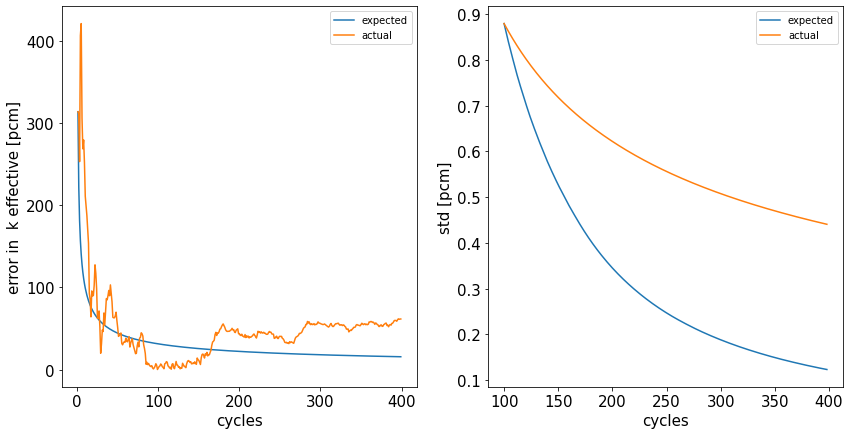

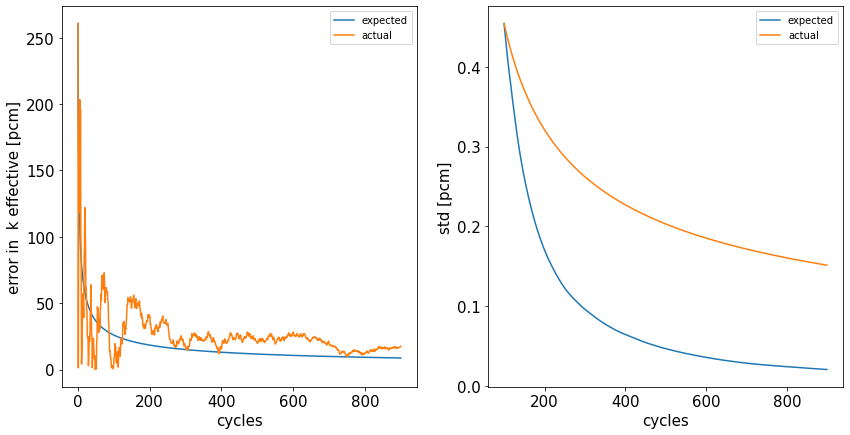

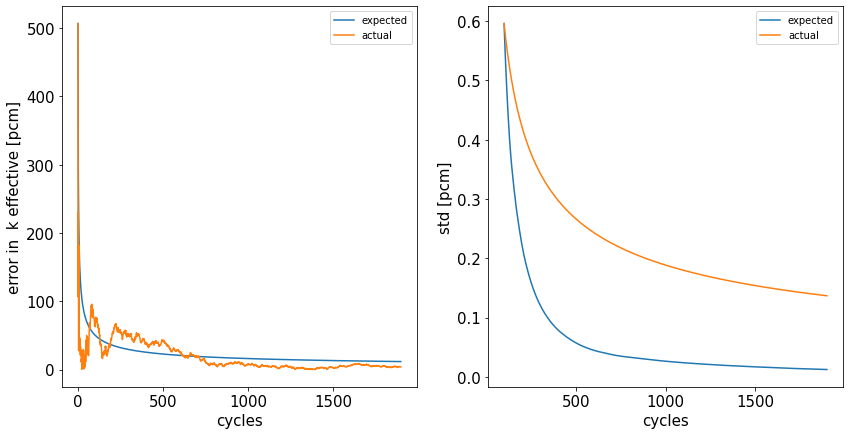

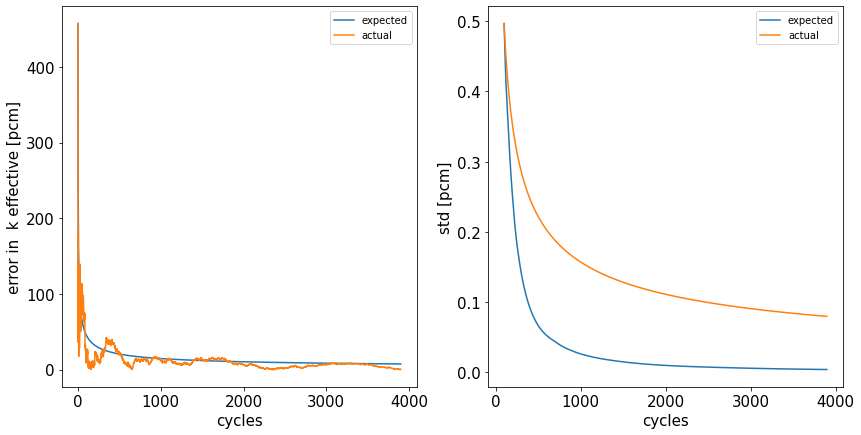

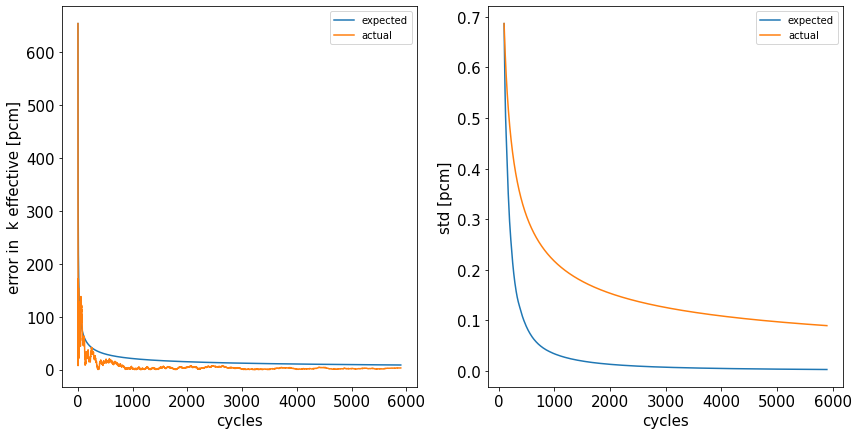

In [44]:
print_graph_2(name_measurings_second_cs)

In [60]:
file_1000 = "/home/xeinia/Desktop/beachmarks_inf/results/1000_a/test.txt"
file_1500 = "/home/xeinia/Desktop/beachmarks_inf/results/1500_a/test.txt"
name_measurings_a_cs = [file_1000, file_1500]

0.051707466490430294
0.028198191745336883


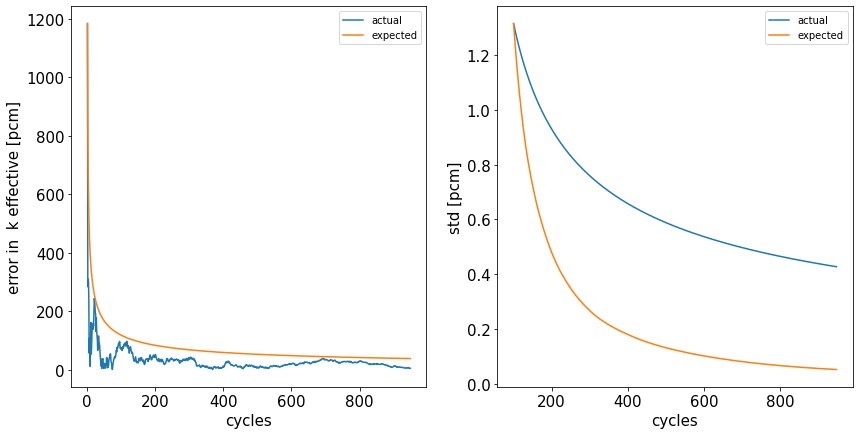

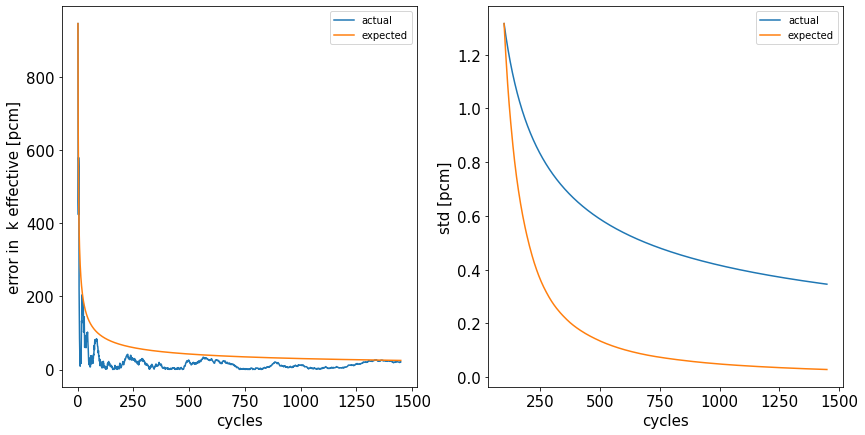

In [61]:
print_graph_2(name_measurings_a_cs, 2.250000)

In [219]:
file_1000 = "/home/xeinia/Desktop/beachmarks_inf/results/1000_b/test.txt"
file_1500 = "/home/xeinia/Desktop/beachmarks_inf/results/1500_b /test.txt"
name_measurings_b_cs = [file_1000, file_1500]

k effective == 23.67858093283992
0.058732527197090066
k effective == 19.93232265027345
0.025627581339628395


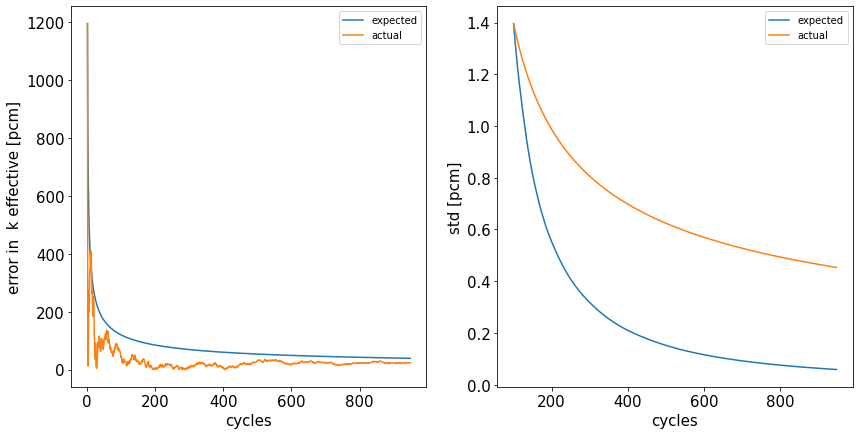

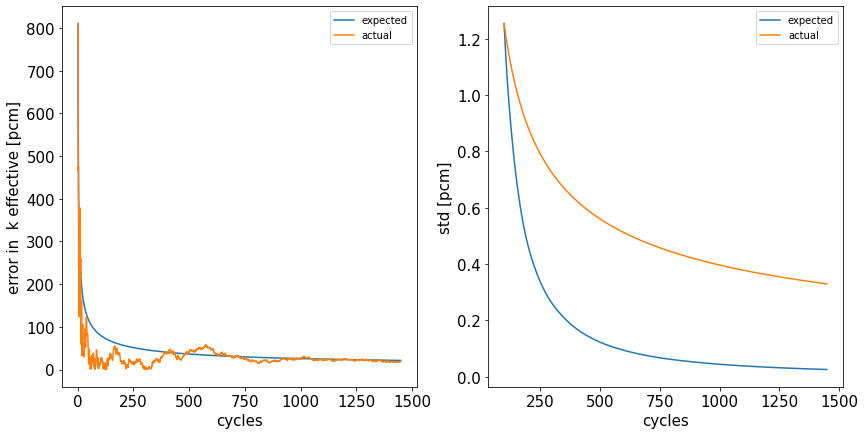

In [53]:
print_graph_2(name_measurings_b_cs, 2.330917)

In [54]:
file_1000 = "/home/xeinia/Desktop/beachmarks_inf/results/1000_c/test.txt"
file_1500 = "/home/xeinia/Desktop/beachmarks_inf/results/1500_c/test.txt"
name_measurings_c_cs = [file_1000, file_1500]

k effective == 5.451360952068995
0.04871325889978997
k effective == 4.865958674749038
0.020673987689316973


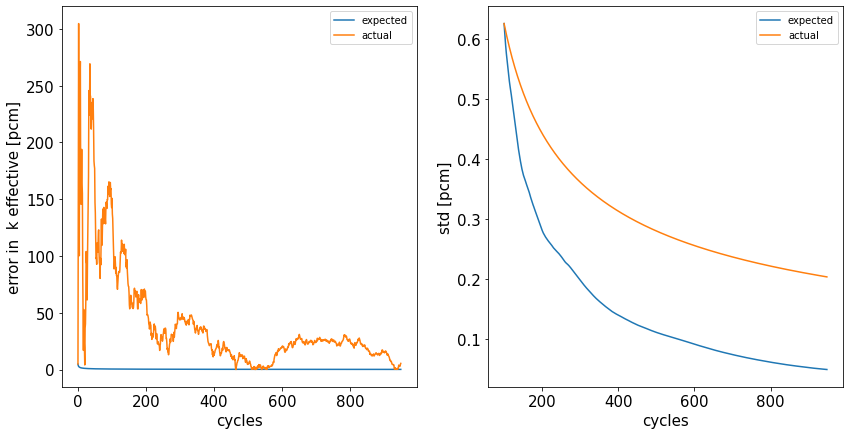

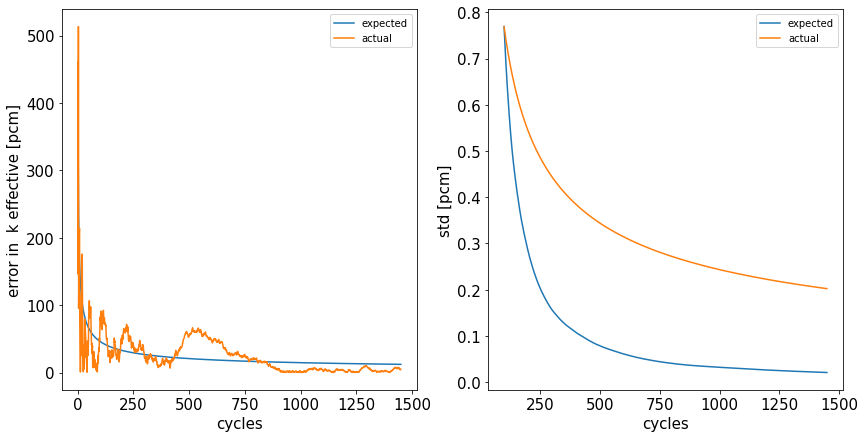

In [55]:
print_graph_2(name_measurings_c_cs, 2.256083)

In [59]:
file_1000 = "/home/xeinia/Desktop/beachmarks_inf/results/1000_d/test.txt"
file_1500 = "/home/xeinia/Desktop/beachmarks_inf/results/1500_d/test.txt"
name_measurings_d_cs = [file_1000, file_1500]

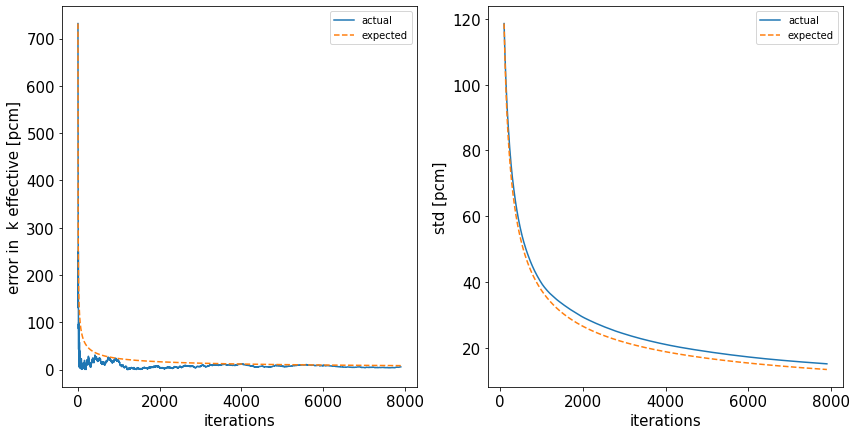


0.05977988894354801
0.018512154120988344


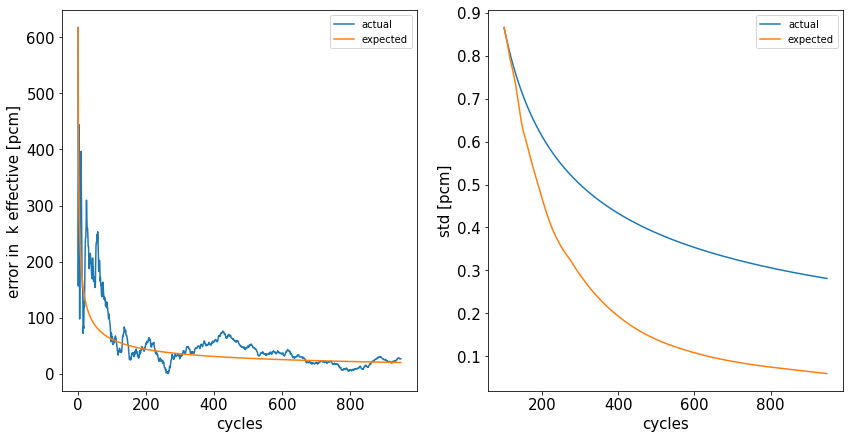

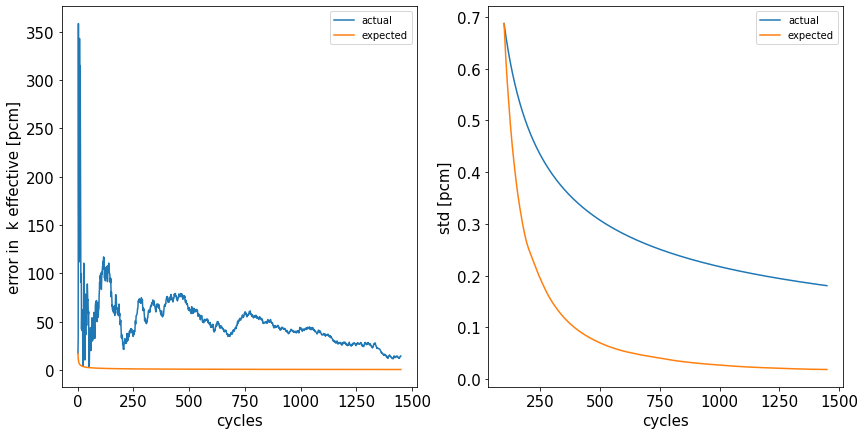

In [145]:
file_1000 = "/home/xeinia/Desktop/beachmarks_inf/results/1000_d/test.txt"
file_1500 = "/home/xeinia/Desktop/beachmarks_inf/results/1500_d/test.txt"
print_graph_2(name_measurings_d_cs, 2.232667)

In [1]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [22]:
def func(x):

    return np.exp(-x)

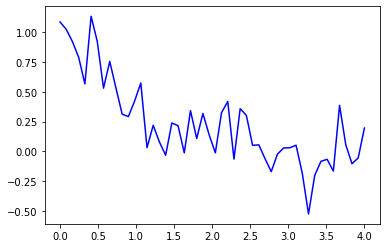

In [23]:
xdata = np.linspace(0, 4, 50)

y = func(xdata)

rng = np.random.default_rng()

y_noise = 0.2 * rng.normal(size=xdata.size)

ydata = y + y_noise

plt.plot(xdata, ydata, 'b-', label='data')

In [24]:
popt, pcov = curve_fit(func, xdata, ydata)

popt
np.array([2.56274217, 1.37268521, 0.47427475])

plt.plot(xdata, func(xdata, *popt), 'r-',

         label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

ValueError: Unable to determine number of fit parameters.

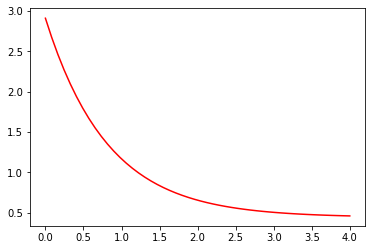

In [14]:
popt, pcov = curve_fit(func, xdata, ydata)



plt.plot(xdata, func(xdata, *popt), 'r-',

         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

No handles with labels found to put in legend.


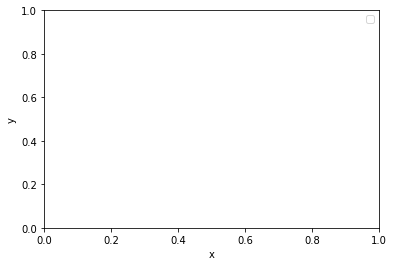

In [12]:
plt.xlabel('x')

plt.ylabel('y')

plt.legend()

plt.show()

In [55]:
def func(x):

    return a * np.exp(-b * x) + c

In [163]:
def func_1(x, a, c):

    return a/np.sqrt(x) + c

In [164]:
k_effective_sample = get_k_effective_from_file(file_1000)
k_effective_sample = np.absolute(np.array(k_effective_sample))
std_, start_idx = compute_std(k_effective_sample)
      
std_ = np.array(std_) * 100000   

iterations_secound = range(start_idx, len(std_) + start_idx)

In [165]:
iterations = np.array(list(range(1, len(k_effective_sample) + 1)))

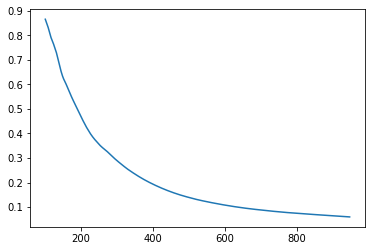

In [166]:
plt.plot(iterations_secound, std_)

In [167]:
iterations_secound[500]

600

In [168]:
std_[500]

0.10806900528501104

In [169]:
std_[500] * np.sqrt(iterations_secound[500])

2.647139199584156

In [170]:
popt, pcov = curve_fit(func_1, iterations_secound, std_)

In [171]:

print(popt)


[11.87019199 -0.36848714]


In [19]:


popt, pcov = curve_fit(func_1, iterations_secound, std_)

plt.figure(figsize=(16, 16), dpi=80)
plt.plot(iterations_secound, std_)
plt.plot(iterations_secound, func_1(iterations_secound, popt[0], popt[1]), 'r-')



NameError: name 'iterations_secound' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.xlabel("iterations")
plt.ylabel("k effective difference")
standart_fx = make_standart_fx(std_6000[0], 1, len(iterations) + 1)
plt.loglog(iterations, std_6000)